In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
import os
num=[]
Z = []
path = '/Users/liuyingjie/Downloads/data/DBSCAN/'
filenames = os.listdir(path)
indexs = []
for filename in filenames:
    if filename.startswith("."):
        continue
    indexs.append(int(filename))
indexs.sort()
#print(indexs)
for index in indexs:
    file_path = path + str(index)
    with open(file_path,'r',encoding='utf8') as f:
        lines=f.readlines()
    for i in range(99, 119):
        temps = lines[i].split()
        point=[]
        point.append(int(temps[2]))
        point.append(int(temps[3]))
        num.append(point)
    for line in lines:
        temps = line.split()
        size = len(temps)
        if(size == 11 and temps[0]=='10000000'):
            Z.append(int(float(temps[1])*37000000000))
            Z.append(int(float(temps[6])*37000000000))
        if(size == 16 and temps[0] == '10000000'):
            Z.append(int(float(temps[1])*37000000000))
            Z.append(int(float(temps[6])*37000000000))
            Z.append(int(float(temps[11])*37000000000))
            
for i in range(len(Z)):
    num[i].append(Z[i])
print(len(num))

220


In [3]:
x1=[]
x2=[]

def getCircle(p1, p2, p3):
    circle=[]
    x21 = p2[0] - p1[0]
    y21 = p2[1] - p1[1]
    x32 = p3[0] - p2[0]
    y32 = p3[1] - p2[1]
    # three colinear
    if (x21 * y32 - x32 * y21 == 0 or x21==0):
        return None
    xy21 = p2[0] * p2[0] - p1[0] * p1[0] + p2[1]* p2[1]- p1[1] * p1[1]
    xy32 = p3[0] * p3[0] - p2[0] * p2[0] + p3[1] * p3[1] - p2[1] * p2[1]
    y0 = (x32 * xy21 - x21 * xy32) / (2 * (y21 * x32 - y32 * x21))
    x0 = (xy21 - 2 * y0 * y21) / (2.0 * x21)
    circle.append(x0)
    circle.append(y0)
    return circle


num.sort(key=lambda k:k[2],reverse=False)
#print(num)
res=[]
#误差设计
interval=370;
for i in range(len(num)):
    for j in range(i+1,len(num)):
        if num[j][2]-num[i][2]>interval:
            break
        for n in range(j+1,len(num)):
            if num[n][2]-num[i][2]>interval:
                break
            ans=getCircle(num[i],num[j],num[n])
            if ans:
                x1.append(ans[0])
                x2.append(ans[1])
#print(x1,x2)


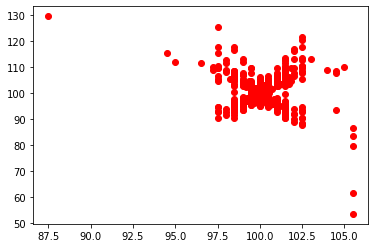

[[100.         106.        ]
 [100.          99.75      ]
 [100.02380952  99.92857143]
 ...
 [101.5         95.5       ]
 [101.          97.        ]
 [100.5         99.5       ]]


In [4]:
plt.plot(x1,x2,'ro')
plt.show()
x_=np.array(x1)
x_.reshape(-1,1)
y_=np.array(x2)
y_.reshape(-1,1)

xn=np.array([x_,y_])
Xn=np.transpose(xn)
dataLen = len(Xn)
print(Xn)

In [5]:
from sklearn.cluster import OPTICS
minNum=len(num)//5
clust = OPTICS(min_samples=minNum)
y_pred=clust.fit_predict(Xn)

y_pred = y_pred.tolist()
X=[]
Y = []
count = 0
for i in y_pred:
    if(i == 0):
        X.append(Xn[count][0])
        Y.append(Xn[count][1])
    count = count + 1

x_sum = 0
y_sum = 0
for i in X:
    x_sum = x_sum + i
for j in Y:
    y_sum = y_sum + j
print(x_sum/len(X))
print(y_sum/len(Y))

100.00678641047062
99.97962127541076
